<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Parcial2/Tierra_plana_parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sym

In [ ]:
#A)
roots, weights = np.polynomial.legendre.leggauss(50)
roots, weights

(array([-0.9988664 , -0.99403197, -0.98535408, -0.97286439, -0.95661096,
        -0.93665662, -0.91307856, -0.88596798, -0.85542977, -0.82158207,
        -0.78455583, -0.7444943 , -0.70155247, -0.65589647, -0.60770293,
        -0.5571583 , -0.50445814, -0.44980633, -0.39341431, -0.33550025,
        -0.27628819, -0.21600724, -0.15489059, -0.0931747 , -0.03109834,
         0.03109834,  0.0931747 ,  0.15489059,  0.21600724,  0.27628819,
         0.33550025,  0.39341431,  0.44980633,  0.50445814,  0.5571583 ,
         0.60770293,  0.65589647,  0.70155247,  0.7444943 ,  0.78455583,
         0.82158207,  0.85542977,  0.88596798,  0.91307856,  0.93665662,
         0.95661096,  0.97286439,  0.98535408,  0.99403197,  0.9988664 ]),
 array([0.00290862, 0.0067598 , 0.01059055, 0.01438082, 0.01811556,
        0.02178024, 0.02536067, 0.02884299, 0.03221373, 0.03545984,
        0.03856876, 0.04152846, 0.0443275 , 0.04695505, 0.04940094,
        0.0516557 , 0.05371062, 0.05555774, 0.05718993, 0.058600

In [ ]:
k= 1.942930396
def Gravitacional (R,r, theta,k):
  x=R[0]
  y=R[1]
  z=R[2]
  f=(-k*r*z)/((r**2 + (z**2) - (2*r*x*np.cos(theta)) - (2*r*y*np.sin(theta)))**(3/2))
  return f

In [ ]:
def Doblecuadratura (a,b,c,d, raices, pesos,f,R,k):
  Integral=0
  for i in range(len(pesos)):
    t1=0.5*((b-a)*raices[i] + a + b)
    for j in range(len(pesos)):
      t2=0.5*((d-c)*raices[j] + c + d)
      Integral+=np.sum(pesos[i]*pesos[j]*f(R,t2,t1,k))
  Integral*=(b-a)*(d-c)/4
  return Integral

Doblecuadratura(0,2*np.pi,0,1,roots, weights,Gravitacional,[0.,0.,0.2],k)

-9.813646786905926

In [ ]:
def Doblecuadratura2 (a,b,c,d, raices, pesos,f,R,k,phi):
  Integral=0
  for j in range(len(pesos)):
    t2=0.5*((d-c)*raices[j] + c + d)
    Integral+=np.sum(pesos[j]*f(R,t2,phi,k))
  Integral*=(d-c)/2
  return Integral

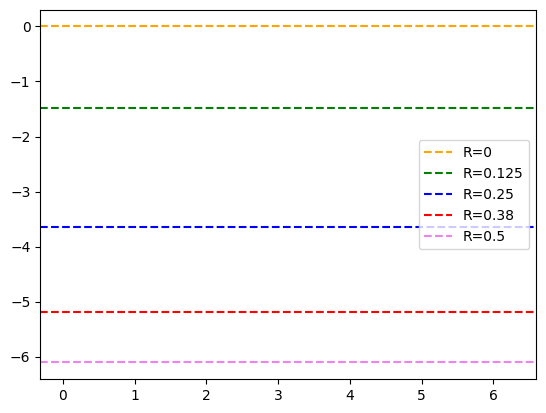

In [ ]:
import matplotlib.pyplot as plt
R=[0,0.125,0.25,0.38,0.5]
phi = np.linspace(0,2*np.pi,5)
g=[]
color = ['orange', 'green', 'blue', "red", 'violet']
for i in range(len(R)):
  Rn=Doblecuadratura2(0,2*np.pi,0,R[i],roots, weights,Gravitacional,[0.,0.,0.2],k,phi)
  g.append(Rn)
  plt.axhline( y=Rn,ls='--', color=color[i], label='R='+str(R[i]))
  plt.legend()
plt.scatter(phi,g, color="white")


In [ ]:
#¿Como interpreta que la gravedad no depende del ´ángulo sobre la tierra?
# interpretamos que sin importar la posición del objeto en x,y la aceleración gravitatoria no se ve
#afectado siempre y cuando el Radio del centro sea constante
#¿Qué valores tiene la gravedad en el ecuador R = 0.5 y en el borde R = 1?
#R1=-9.813646786905926
#R0.5= -6.106720810603047
#¿Qué podría decirle a un amig@ terraplanista con base a sus resultados teóricos?
#que el modelo gravitacional de la tierra plana no haya sentido porque en ese caso entre más alejados estemos de un polo nuestra aceleración gravitatoria
#o nuestro peso cambiaria, cosa que no sucede en la realidad
